In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
path = "Park Unit Scraping Information.csv"
parks = pd.read_csv(path, encoding='latin-1')
parks.head()

,Park Name,Type of Unit,State,Reg,Alpha,Unit
0,Abraham Lincoln Birthplace,National Historical Park,KY,SER,ABLI,1.0
1,Acadia,National Park,ME,NER,ACAD,1.0
2,Adams,National Historical Park,MA,NER,ADAM,1.0
3,African Burial Ground,National Monument,NY,NER,AFBG,1.0
4,Agate Fossil Beds,National Monument,NE,MWR,AGFO,1.0


In [3]:
df = pd.read_csv("./TDx_tracker.csv")

In [4]:
df.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,event end date
0,2024-02-27,Crater Lake National Park,Road from Park HQ to Rim Village CLOSED,Road from park headquarters to Rim Village is ...,incident,['Munson Valley Road HQ to Rim Village'],all-lanes-closed,2024-02-25T18:03:00Z,NaN
1,2024-02-27,Crater Lake National Park,Road from Park HQ to Rim Village CLOSED,Road from park headquarters to Rim Village is ...,incident,['Munson Valley Road HQ to Rim Village'],all-lanes-closed,2024-02-25T18:03:00Z,NaN
2,2024-02-27,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"['North Entrance Road', 'East Rim Drive', 'Pin...",all-lanes-closed,2023-11-01T12:19:00Z,NaN
3,2024-02-27,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"['North Entrance Road', 'East Rim Drive', 'Pin...",all-lanes-closed,2023-11-01T12:19:00Z,NaN
4,2024-02-27,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"['North Entrance Road', 'East Rim Drive', 'Pin...",all-lanes-closed,2023-11-01T12:19:00Z,NaN


In [5]:
df.shape

(145, 9)

In [6]:
df.park.value_counts()

Shenandoah National Park                22
Mojave National Preserve                21
Great Smoky Mountains National Park     20
Crater Lake National Park               14
Yosemite National Park                   8
Acadia National Park                     7
Padre Island National Seashore           6
Olympic National Park                    5
Fort Point National Historic Site        5
Death Valley National Park               4
Dinosaur National Monument               4
Bryce Canyon National Park               4
Zion National Park                       4
Golden Gate National Recreation Area     4
Natchez Trace Parkway                    4
Buffalo National River                   2
Organ Pipe Cactus National Monument      2
Point Reyes National Seashore            2
Piscataway Park                          2
Big Bend National Park                   2
Guadalupe Mountains National Park        2
Muir Woods National Monument             1
Name: park, dtype: int64

In [7]:
len(df.park.unique())

22

In [8]:
df.date.value_counts()

2024-02-27    77
2023-10-23    11
2023-10-17    11
2024-02-01     8
2024-02-12     6
2024-02-05     6
2024-01-11     5
2024-01-18     4
2023-12-18     4
2023-11-27     4
2024-01-25     3
2024-01-04     3
2023-12-28     3
Name: date, dtype: int64

In [9]:
df = df.sort_values(by=['date'])

In [10]:
running_park_list = []
date_list = []
park_count_list = []

for x in df.date.unique():
    df_date = df.loc[df['date']==x]
    print(x, ": ", len(df_date))
    for y in df_date['park']:
        if y not in running_park_list:
            print(y)
            running_park_list.append(y)
    date_list.append(x)
    park_count_list.append(len(running_park_list))

2023-10-17 :  11
Golden Gate National Recreation Area
Yosemite National Park
Mojave National Preserve
Acadia National Park
Olympic National Park
Dinosaur National Monument
Natchez Trace Parkway
2023-10-23 :  11
2023-11-27 :  4
Padre Island National Seashore
2023-12-18 :  4
Fort Point National Historic Site
Muir Woods National Monument
2023-12-28 :  3
2024-01-04 :  3
2024-01-11 :  5
Shenandoah National Park
2024-01-18 :  4
2024-01-25 :  3
2024-02-01 :  8
2024-02-05 :  6
2024-02-12 :  6
2024-02-27 :  77
Zion National Park
Big Bend National Park
Crater Lake National Park
Point Reyes National Seashore
Bryce Canyon National Park
Death Valley National Park
Great Smoky Mountains National Park
Piscataway Park
Buffalo National River
Organ Pipe Cactus National Monument
Guadalupe Mountains National Park


In [11]:
park_count_list

[7, 7, 8, 10, 10, 10, 11, 11, 11, 11, 11, 11, 22]

In [12]:
df_count = pd.DataFrame({
    'date': date_list,
    "count of parks": park_count_list
})
df_count['date'] = pd.to_datetime(df_count['date'])
print(df_count['date'].dtypes)


datetime64[ns]


In [13]:
df_count

,date,count of parks
0,2023-10-17,7
1,2023-10-23,7
2,2023-11-27,8
3,2023-12-18,10
4,2023-12-28,10
5,2024-01-04,10
6,2024-01-11,11
7,2024-01-18,11
8,2024-01-25,11
9,2024-02-01,11


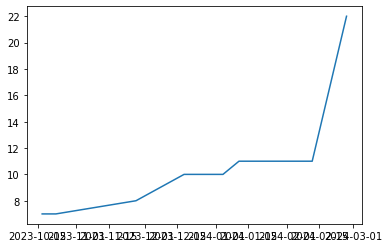

In [14]:
plt.plot(df_count.date, df_count['count of parks'])



[]

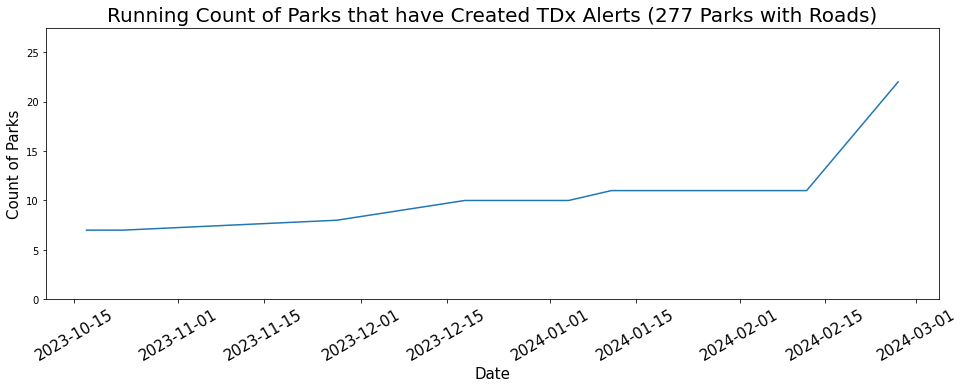

In [15]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df_count.date, df_count['count of parks'])

# Adding a plot title and customizing its font size
plt.title('Running Count of Parks that have Created TDx Alerts (277 Parks with Roads)', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Count of Parks', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=15)
plt.ylim([0,max(df_count['count of parks'])*1.25])

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()
